In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-of-thronesgot/game of thrones.csv


In [5]:
train_df = pd.read_csv("/kaggle/input/game-of-thronesgot/game of thrones.csv")
train_df.head(10)

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1
5,6,6,1,"""A Golden Crown""",Daniel Minahan,David Benioff & D. B. Weiss,A Game of Thrones,22-May-11,2.44,9.2
6,7,7,1,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,A Game of Thrones,NaN,2.40,9.2
7,8,8,1,"""The Pointy End""",Daniel Minahan,George R. R. Martin,A Game of Thrones,5-Jun-12,2.72,9.0
8,9,9,1,"""Baelor""",Alan Taylor,David Benioff & D. B. Weiss,A Game of Thrones,12-Jun-12,2.66,9.6
9,10,10,1,"""Fire and Blood""",Alan Taylor,David Benioff & D. B. Weiss,A Game of Thrones,19-Jun-12,3.04,9.5


In [10]:
print(len(train_df))
summary = pd.DataFrame(train_df.dtypes)
summary["null"] = train_df.isnull().sum()
summary["unique"] = train_df.nunique()
summary["first"] = train_df.loc[0]
summary["second"] = train_df.loc[1]
summary["third"] = train_df.loc[2]
summary

73


,0,null,unique,first,second,third
No. overall,int64,0,73,1,2,3
No. in season,int64,0,10,1,2,3
Season,int64,0,8,1,1,1
Title,object,0,73,"""Winter Is Coming""","""The Kingsroad""","""Lord Snow"""
Directed by,object,0,20,Tim Van Patten,Tim Van Patten,Brian Kirk
Written by,object,0,5,David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,David Benioff & D. B. Weiss
Novel(s) adapted,object,0,6,A Game of Thrones,A Game of Thrones,A Game of Thrones
Original air date,object,12,61,17-Apr-11,24-Apr-11,1-May-11
U.S. viewers(millions),float64,3,68,2.22,2.2,2.44
Imdb rating,float64,0,22,9.1,8.8,8.7


There are 73 rows in total as in there are 73 episodes in GOT so it makes sense to have 73 rows and there are few null values as well in the case fo US viewers and original air date. Title will much not make much sense while analysing the data. No. overall is same as index which is just a range of 73 values and so are the no. in season. Imdb rating is quite nice part of this dataset and US viewers as well.

In [14]:
train_df["Novel(s) adapted"].unique()
train_df["Directed by"].unique()
train_df["Written by"].unique()
# Novels adapted are not always the same as we can see there are quite some unique values.

array(['David Benioff & D. B. Weiss', 'Bryan Cogman',
       'George R. R. Martin', 'Vanessa Taylor', 'Dave Hill'], dtype=object)

# Average rating on the basis of season

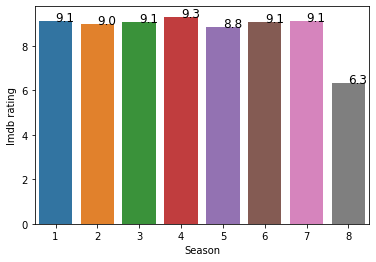

In [245]:
def write_percent_of_plot(ax, season_ratings):
    for patches in ax.patches:
        width = patches.get_width()
        height = patches.get_height()
        get_x = patches.get_x()
        value = height 
        ax.text(x = get_x + width/2, y = height, s = '{:1.1f}'.format(value), fontsize=12 )
fig,ax = plt.subplots(1,1)
season_ratings = train_df.groupby("Season").agg({"Imdb rating": "mean"})
season_ratings.reset_index(inplace=True)
sns.barplot(data=season_ratings, x="Season", y="Imdb rating")
write_percent_of_plot(ax, season_ratings)

Anybody who has seen GOT, these ratings would be quite relatable. Season 8 has been rated the lowest and season 4 seems to be the best season and on average except for season 8, it is quite visible that the average lies between 8.7 to 10

In [246]:
train_df.columns

Index(['No. overall', 'No. in season', 'Season', 'Title', 'Directed by',
       'Written by', 'Novel(s) adapted', 'Original air date',
       'U.S. viewers(millions)', 'Imdb rating'],
      dtype='object')

In [247]:
def write_percent(ax, season_ratings):
    for patches in ax.patches:
        height = patches.get_width()
        width = patches.get_height()
        get_x = patches.get_y()
        value = height
        ax.text(y = get_x + width/2, x = height+0.4, s = '{:1.1f}'.format(value), fontsize=12 )

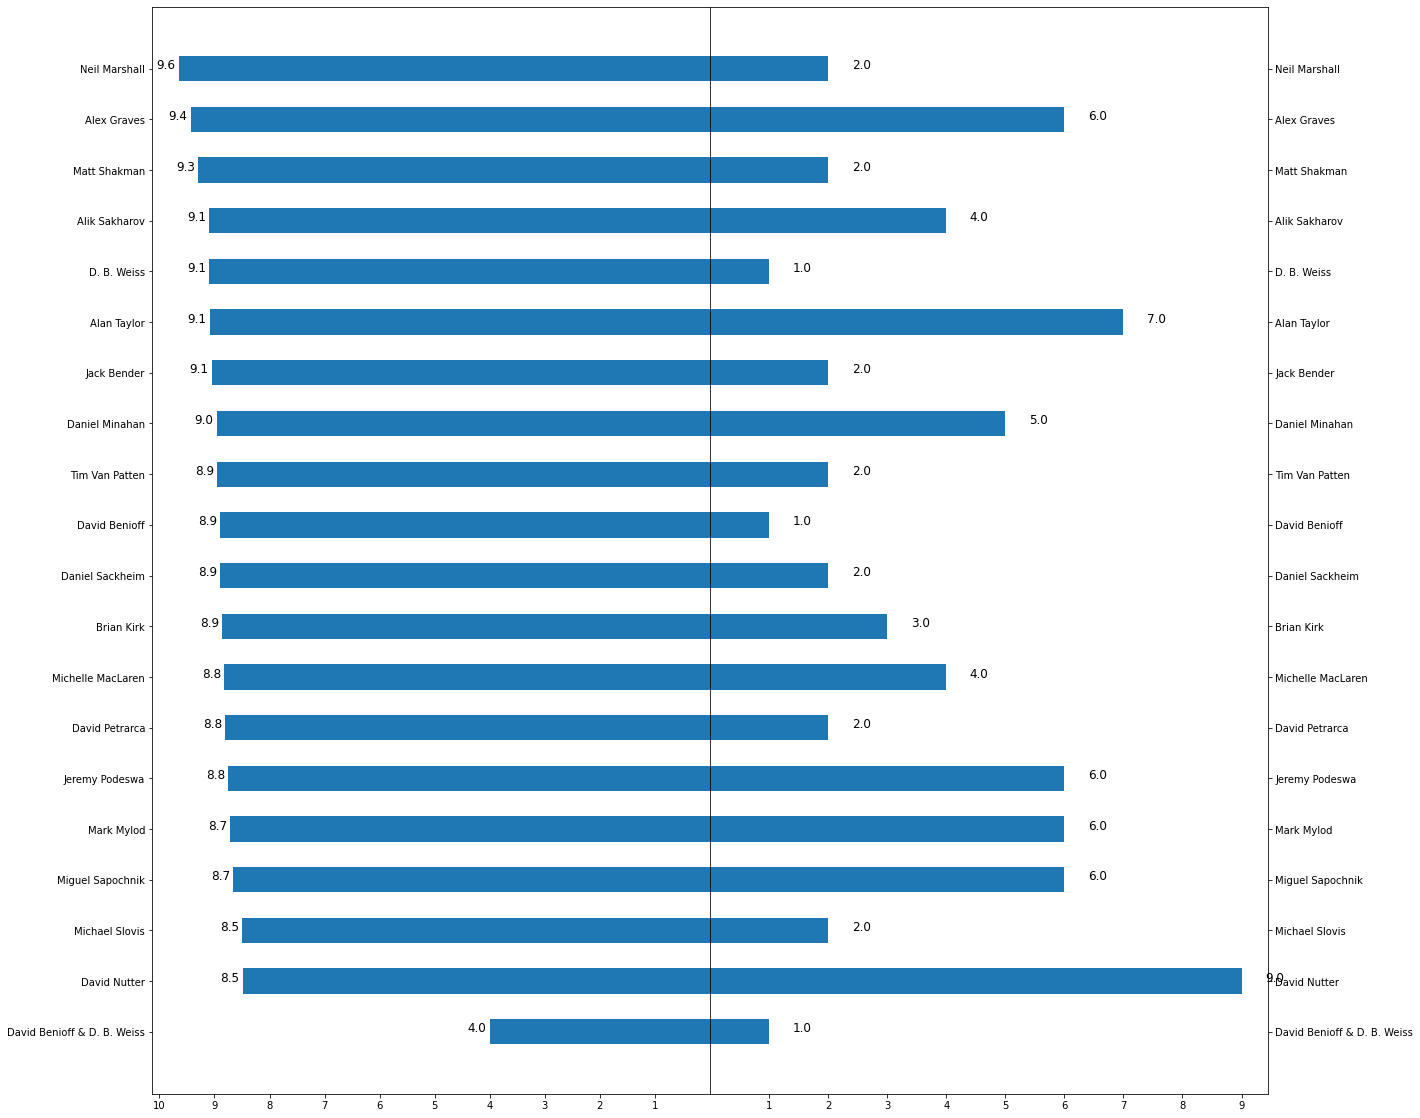

In [248]:
season_ratings = train_df.groupby("Directed by").agg({"Imdb rating": "mean"}).sort_values(by = "Imdb rating")
season_ratings.reset_index(inplace = True)
fg, ax = plt.subplots(1, 2, figsize = (20,20))
plt.subplots_adjust(wspace=0)

ax[0].invert_xaxis()
ax[0].set_xticks(range(1, 11))
ax[0].barh(y = season_ratings["Directed by"], width = season_ratings["Imdb rating"], height = 0.5, tick_label = season_ratings["Directed by"])

write_percent(ax[0], season_ratings)

episodes = train_df.groupby("Directed by").count()
episodes.reset_index(inplace=True)
wholedf = season_ratings.merge(episodes, on="Directed by", how = "inner")

ax[1].set_xticks(range(1,11))
ax[1].barh(y = wholedf["Directed by"], width = wholedf["Imdb rating_y"], height = 0.5, tick_label = wholedf["Directed by"])
ax[1].yaxis.tick_right()
write_percent(ax[1], episodes)





 We can see from above plot that David Benioff & D.B. Weiss got a very bad overall rating for the episodes he directed and Neill Masrhall got the highest. The number of episodes that Neil Marshall has done is 2 while David Benioff & D.B. Weiss did 1 episode and did not go well.

In [249]:
train_df.columns

Index(['No. overall', 'No. in season', 'Season', 'Title', 'Directed by',
       'Written by', 'Novel(s) adapted', 'Original air date',
       'U.S. viewers(millions)', 'Imdb rating'],
      dtype='object')

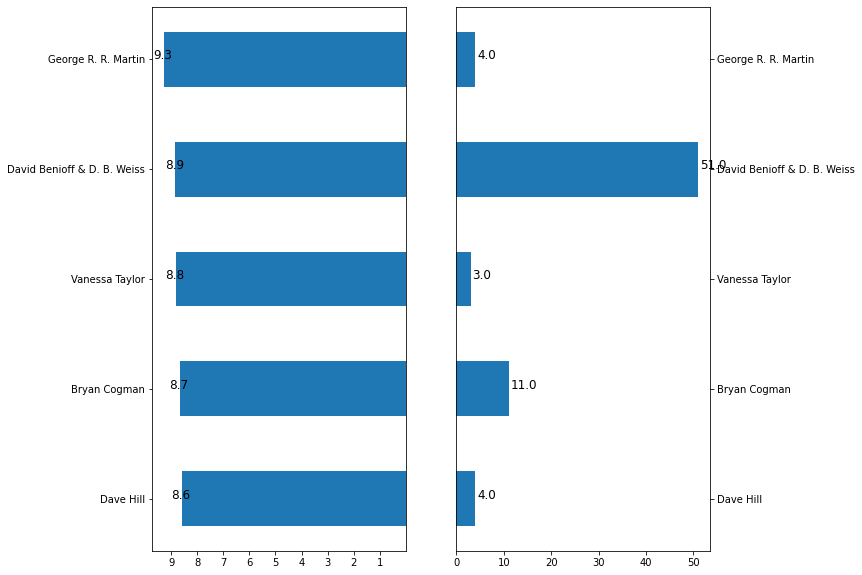

In [250]:
season_ratings = train_df.groupby("Written by").agg({"Imdb rating": "mean"}).sort_values(by = "Imdb rating")
season_ratings.reset_index(inplace=True)
fg, ax = plt.subplots(1, 2, figsize = (10,10))

ax[0].invert_xaxis()
ax[0].set_xticks(range(1, 10))
ax[0].barh(y = season_ratings["Written by"], width = season_ratings["Imdb rating"], height = 0.5, tick_label = season_ratings["Written by"])

write_percent(ax[0], season_ratings)


episodes = train_df.groupby("Written by").count()
episodes.reset_index(inplace=True)
wholedf = season_ratings.merge(episodes, on="Written by", how = "inner")

ax[1].yaxis.tick_right()
ax[1].barh(y = wholedf["Written by"], width = wholedf["Imdb rating_y"], height= 0.5, tick_label = wholedf["Written by"])

write_percent(ax[1], episodes)

##### This chart is quite supporting the writing skills of David Benioff and D.B Weiss and most of the episodes are written by him and also he is having a solid 8.9 rating as well.

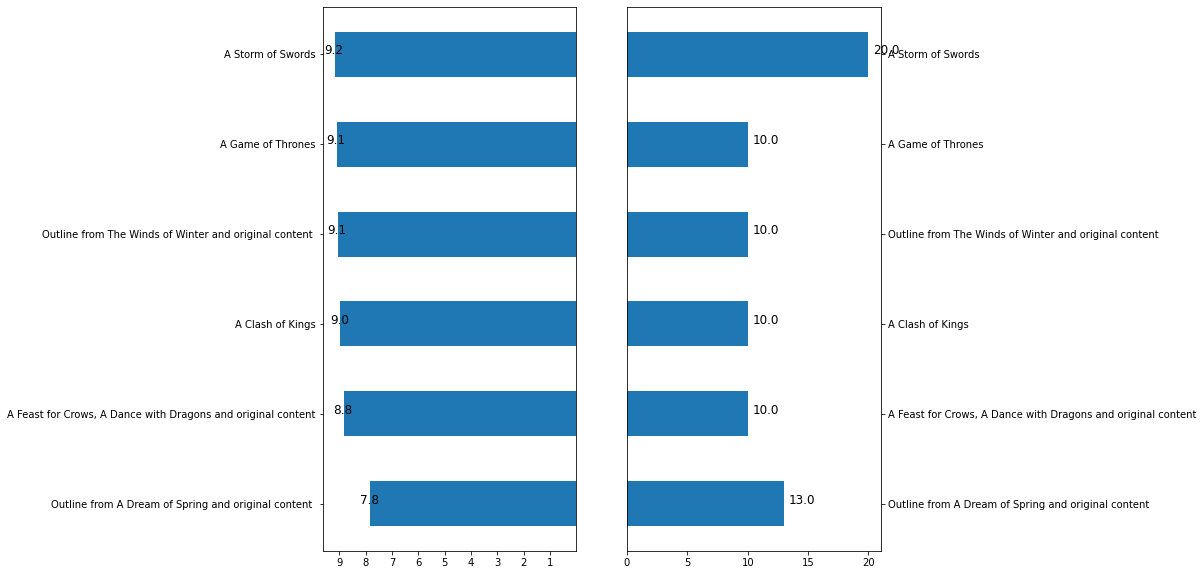

In [251]:
season_ratings = train_df.groupby("Novel(s) adapted").agg({"Imdb rating": "mean"}).sort_values(by = "Imdb rating")
season_ratings.reset_index(inplace=True)
fg, ax = plt.subplots(1, 2, figsize = (10,10))

ax[0].invert_xaxis()
ax[0].set_xticks(range(1, 10))
ax[0].barh(y = season_ratings["Novel(s) adapted"], width = season_ratings["Imdb rating"], height = 0.5, tick_label = season_ratings["Novel(s) adapted"])

write_percent(ax[0], season_ratings)


episodes = train_df.groupby("Novel(s) adapted").count()
episodes.reset_index(inplace=True)
wholedf = season_ratings.merge(episodes, on="Novel(s) adapted", how = "inner")

ax[1].yaxis.tick_right()
ax[1].barh(y = wholedf["Novel(s) adapted"], width = wholedf["Imdb rating_y"], height= 0.5, tick_label = wholedf["Novel(s) adapted"])

write_percent(ax[1], episodes)

 This chart shows that most of the episodes are taken from the novel "A storm of words". The second novel that have been used in many episodes is Outline from a dream of spring and original content and the overall rating to episodes that took the content from this novel got 7.8 which is lowest.

In [252]:
for season in range(1, 2):
    grouped_seasons = train_df[train_df["Season"] == 8]
    print(grouped_seasons["Directed by"], grouped_seasons["Imdb rating"], grouped_seasons["Written by"])


67                   David Nutter
68                   David Nutter
69               Miguel Sapochnik
70                   David Nutter
71               Miguel Sapochnik
72    David Benioff & D. B. Weiss
Name: Directed by, dtype: object 67    7.5
68    7.8
69    7.4
70    5.4
71    5.9
72    4.0
Name: Imdb rating, dtype: float64 67                      Dave Hill
68                   Bryan Cogman
69    David Benioff & D. B. Weiss
70    David Benioff & D. B. Weiss
71    David Benioff & D. B. Weiss
72    David Benioff & D. B. Weiss
Name: Written by, dtype: object
